 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = Path("Resources/whale_returns.csv")

whale_returns = pd.read_csv(whale_path, parse_dates=True, infer_datetime_format=True, index_col="Date")
whale_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns = whale_returns.dropna().copy()
whale_returns.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [5]:
whale_returns.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")

algo_returns = pd.read_csv(algo_path, parse_dates=True, infer_datetime_format=True, index_col="Date")
algo_returns.head()
algo_returns.dtypes


Algo 1    float64
Algo 2    float64
dtype: object

In [7]:
# Count nulls

algo_returns.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns.dropna(inplace=True)

algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices

SP500_path = Path("Resources/sp500_history.csv")

SP500_returns = pd.read_csv(SP500_path, parse_dates=True, infer_datetime_format=True, index_col="Date")
SP500_returns.head()


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [10]:
SP500_returns.sort_index(ascending=True,inplace=True)
SP500_returns.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [11]:
# Check Data Types
SP500_returns.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types

SP500_returns["Close"]=SP500_returns["Close"].str.replace ("$","")

SP500_returns["Close"] = SP500_returns["Close"].str.replace(",", "")

SP500_returns["Close"]

Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
2012-10-08    1455.88
2012-10-09    1441.48
2012-10-10    1432.56
2012-10-11    1432.84
2012-10-12    1428.59
2012-10-15    1440.13
2012-10-16    1454.92
2012-10-17    1460.91
2012-10-18    1457.34
2012-10-19    1433.19
2012-10-22    1433.82
2012-10-23    1413.11
2012-10-24    1408.75
2012-10-25    1412.97
2012-10-26    1411.94
2012-10-31    1412.16
2012-11-01    1427.59
2012-11-02    1414.20
2012-11-05    1417.26
2012-11-06    1428.39
2012-11-07    1394.53
2012-11-08    1377.51
2012-11-09    1379.85
2012-11-12    1380.03
2012-11-13    1374.53
               ...   
2019-03-12    2791.52
2019-03-13    2810.92
2019-03-14    2808.48
2019-03-15    2822.48
2019-03-18    2832.94
2019-03-19    2832.57
2019-03-20    2824.23
2019-03-21    2854.88
2019-03-22    2800.71
2019-03-25    2798.36
2019-03-26    2818.46
2019-03-27    2805.37
2019-03-28    2815.44
2019-03-29    2834.40
2019-

In [13]:
SP500_returns.isnull().sum()

Close    0
dtype: int64

In [14]:
# Drop nulls
SP500_returns.dropna(inplace=True)

SP500_returns.isnull().sum()

Close    0
dtype: int64

In [15]:
SP500_returns["Close"] = SP500_returns["Close"].astype(float)
SP500_returns.dtypes

Close    float64
dtype: object

In [16]:
# Calculate Daily Returns
SP500_daily_returns=SP500_returns.pct_change()
SP500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [17]:
SP500_daily_returns.dropna(inplace=True)

In [18]:
# Rename `Close` Column to be specific to this portfolio.
SP500_daily_returns = SP500_daily_returns.rename(columns={"Close": "SP500"})
SP500_daily_returns.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [19]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns = pd.concat([whale_returns,algo_returns,SP500_daily_returns],axis="columns",join="inner")
all_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.001918
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.012601
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.006075


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

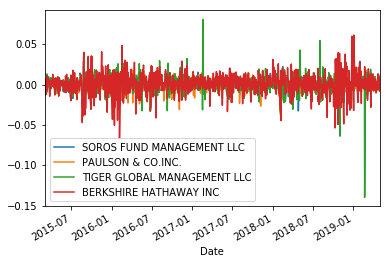

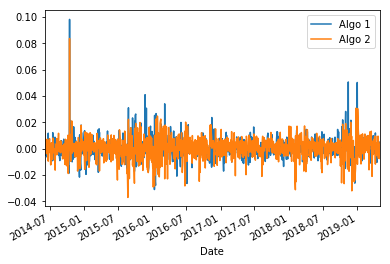

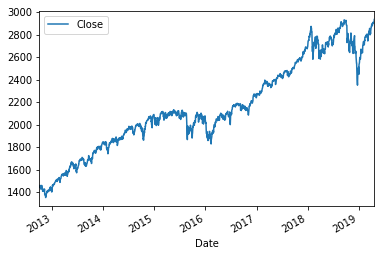

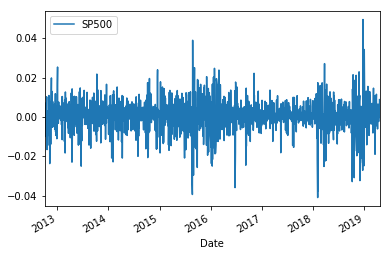

In [20]:
# Plot daily returns of all portfolios
%matplotlib inline
whale_returns.plot()
algo_returns.plot()
SP500_returns.plot()
SP500_daily_returns.plot()

#### Calculate and Plot cumulative returns.

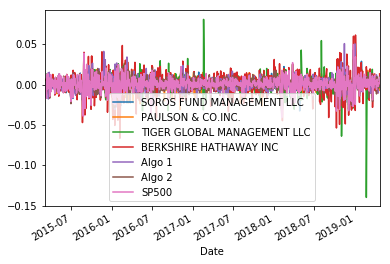

In [21]:
# Calculate cumulative returns of all portfolios
all_returns.plot()
# Plot cumulative returns


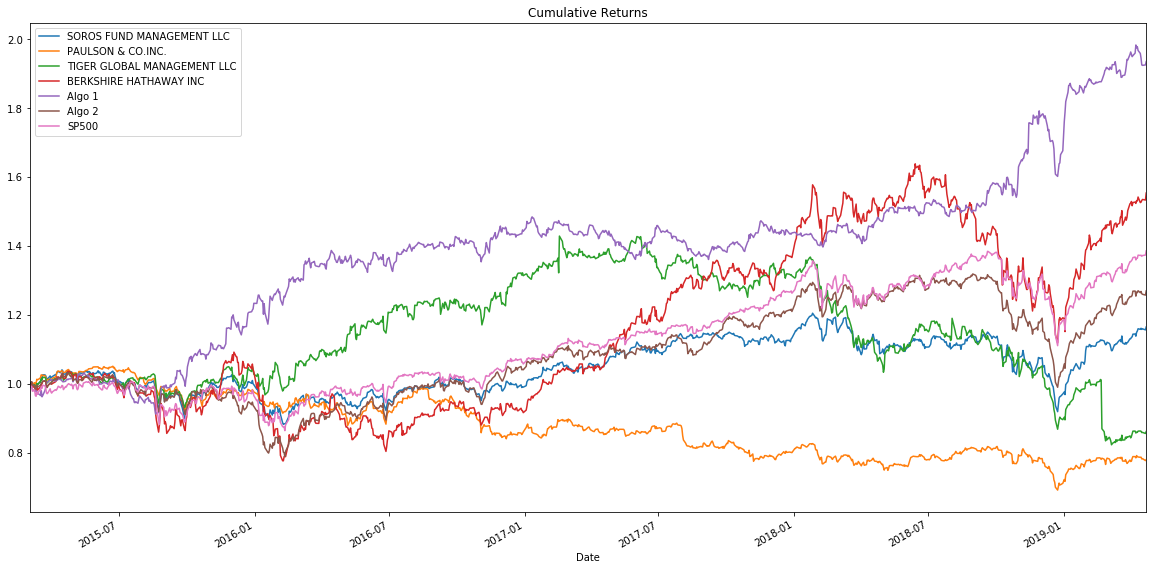

In [22]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_returns).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10), title="Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


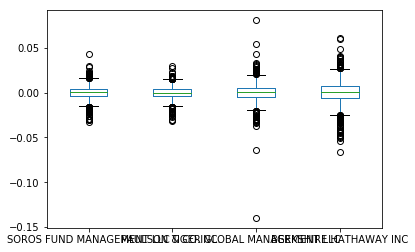

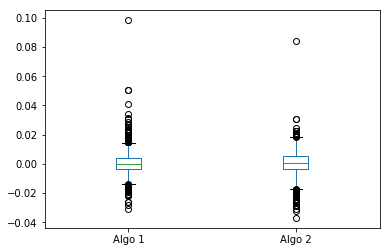

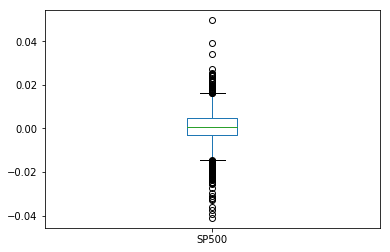

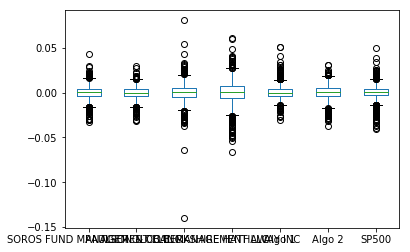

In [23]:
# Box plot to visually show risk

whale_returns.plot.box()
algo_returns.plot.box()
SP500_daily_returns.plot.box()
all_returns.plot.box()

### Calculate Standard Deviations

In [24]:
# Calculate the daily standard deviations of all portfolios
whale_returns_std=whale_returns.std()
algo_returns_std=algo_returns.std()
SP500_daily_returns_std=SP500_daily_returns.std()
all_returns.std()

whale_returns_std.head()
algo_returns_std.head()
SP500_daily_returns_std.head()

SP500    0.008111
dtype: float64

In [25]:
all_returns_std = all_returns.std()
all_returns_std = all_returns_std.sort_values(ascending=False)
all_returns_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
SP500                          0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [55]:
# Calculate  the daily standard deviation of S&P 500
SP500_risk = all_returns["SP500"].std()
# Determine which portfolios are riskier than the S&P 500
all_returns.std() > SP500_risk

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
SP500                          False
Custom                         False
dtype: bool

### Calculate the Annualized Standard Deviation

In [57]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = all_returns.std()* np.sqrt(252)
annualized_std.head()

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
dtype: float64

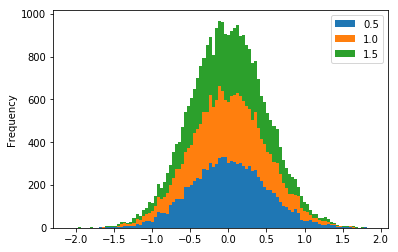

In [28]:
whale_returns_std=np.random.normal(scale=0.5, size=10000)
algo_returns_std=np.random.normal(scale=0.5, size=10000)
SP500_daily_returns_std=np.random.normal(scale=0.5, size=10000)

portfolio_std = pd.DataFrame({
    "0.5": whale_returns_std,
    "1.0": algo_returns_std,
    "1.5": SP500_daily_returns_std})

portfolio_std.plot.hist(stacked=True, bins=100)

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

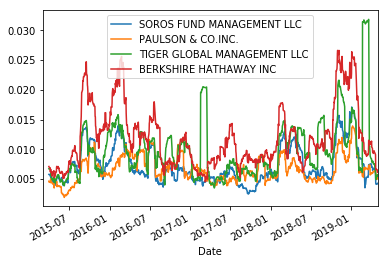

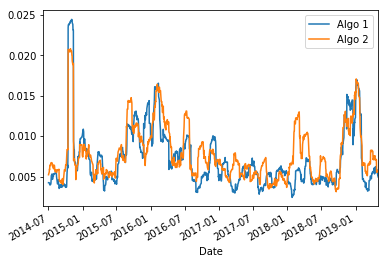

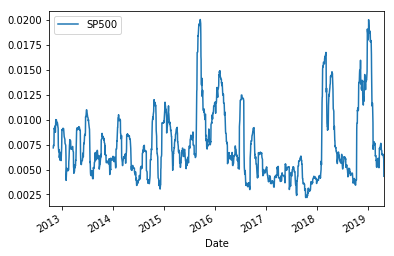

In [29]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation

whale_returns.rolling(window=21).std().plot()
algo_returns.rolling(window=21).std().plot()
SP500_daily_returns.rolling(window=21).std().plot()

### Calculate and plot the correlation

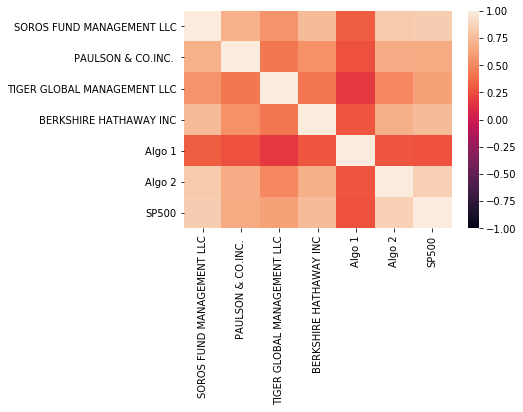

In [30]:
# Calculate the correlation

correlation = all_returns.corr()
correlation

# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [31]:
# Calculate covariance of a single portfolio
covariance = all_returns['Algo 1'].cov(all_returns['SP500'])
covariance


1.8217749991632826e-05

In [32]:
# Calculate variance of S&P 500
variance = SP500_daily_returns['SP500'].var()
variance


6.579270583158746e-05

In [58]:
# Computing beta# Plot beta trend
Algo1_beta = covariance / variance
Algo1_beta.plot(figsize=(20, 10), title="Algo 1 Beta")


AttributeError: 'numpy.float64' object has no attribute 'plot'

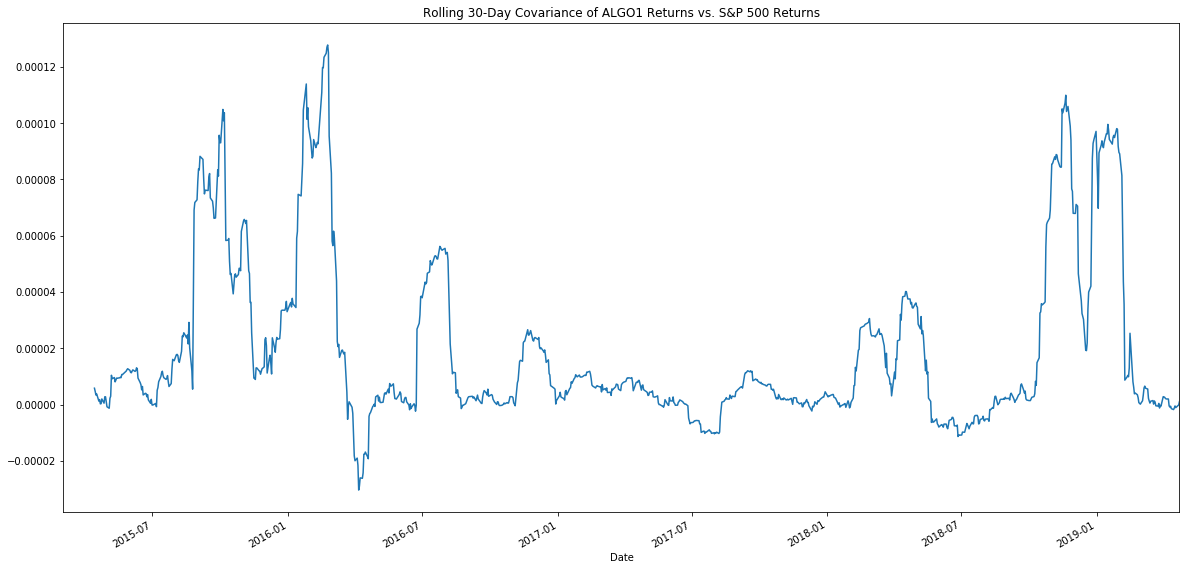

In [34]:
#to plot beta add: Calculate 30-day rolling covariance of Algo 1 vs. S&P 500 and plot the data
rolling_covariance = all_returns['Algo 1'].rolling(window=30).cov(all_returns['SP500'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of ALGO1 Returns vs. S&P 500 Returns')

In [35]:
#to plot beta add: Calculate 30-day rolling variance S&P 500 and plot the data
rolling_variance = all_returns['SP500'].rolling(window=30).var()
# Calculate 30-day rolling beta of AMZN and plot the datarolling_variance.plot(figsize=(20, 10), title='Rolling 30-Day Variance of S&P 500 Returns')

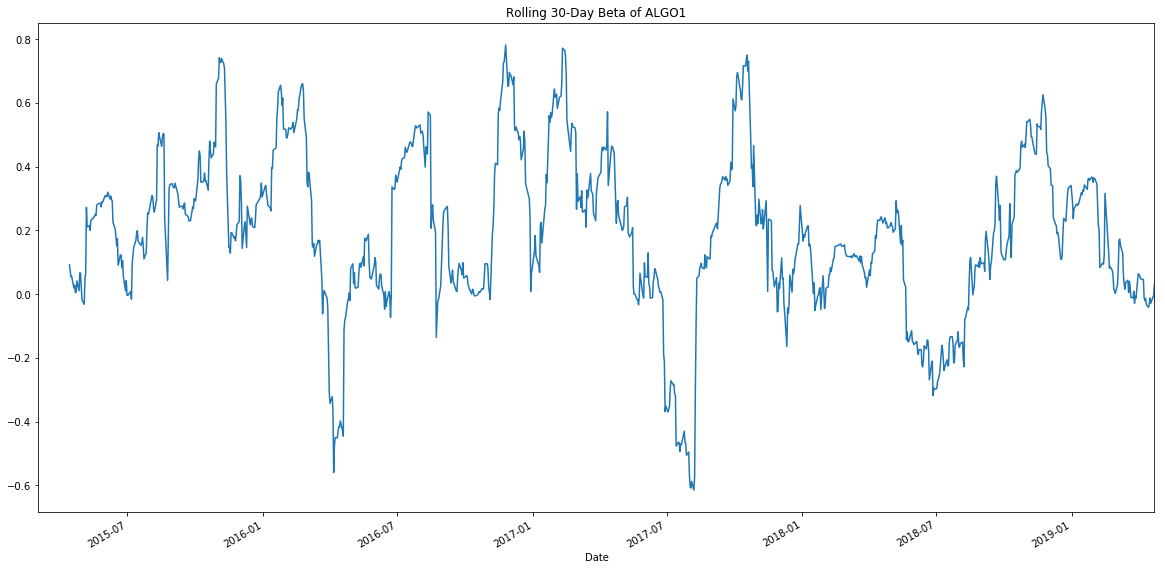

In [36]:
# 30-day rolling beta of ALGO1 with plot
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of ALGO1')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

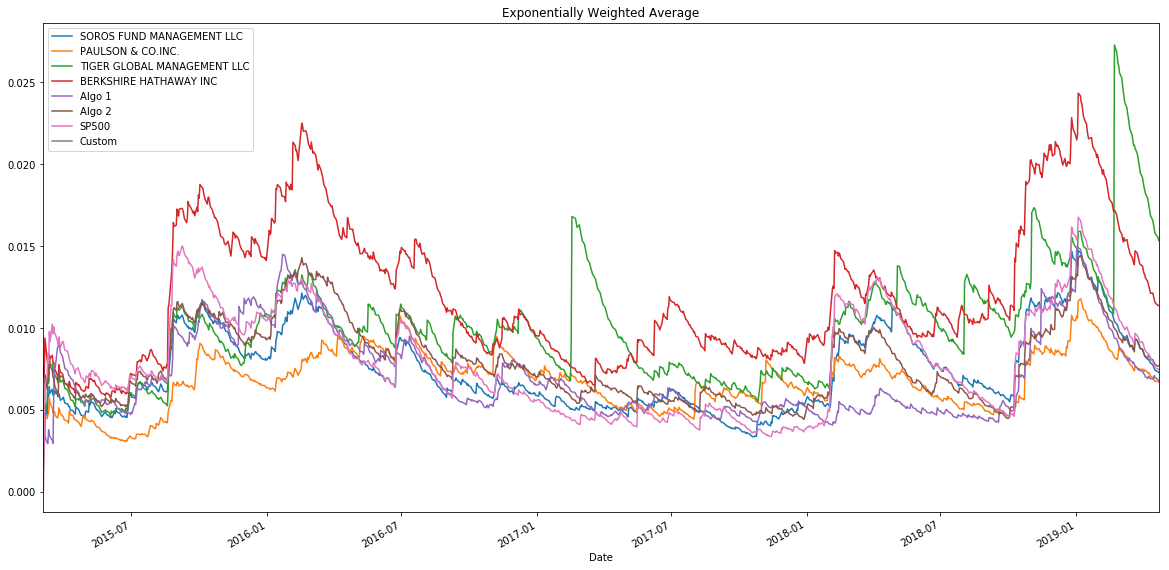

In [60]:
# Use `ewm` to calculate the rolling window

all_returns.ewm(halflife=21).std().plot(figsize=(20, 10), title="Exponentially Weighted Average")

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [38]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios


SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500                          0.648267
dtype: float64

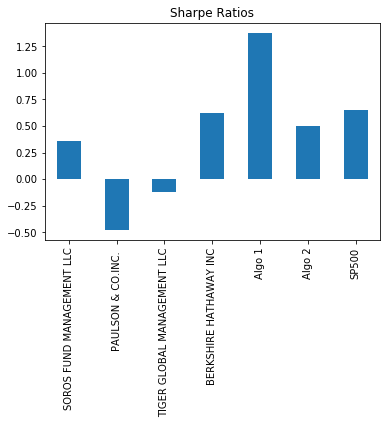

In [39]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [65]:
# Reading data from 1st stock
Google_data = Path("Resources/goog_historical.csv")
Google_df = pd.read_csv(Google_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
Google_df.head()


,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [67]:
# Reading data from 2nd stock
Apple_data = Path("Resources/aapl_historical.csv")
Apple_df = pd.read_csv(Apple_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
Apple_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [69]:
# Reading data from 3rd stock
Costco_data = Path("Resources/cost_historical.csv")
Costco_df = pd.read_csv(Costco_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
Costco_df = Costco_df.sort_index()
Costco_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [71]:
# Combine all stocks in a single DataFrame
all_stocks = pd.concat([Google_df, Apple_df, Costco_df], axis="rows", join="inner")
all_stocks.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [72]:
# Reset Date index
all_stocks = all_stocks.reset_index()
all_stocks.head()

,Trade DATE,Symbol,NOCP
0,2019-05-09,GOOG,1162.38
1,2019-05-08,GOOG,1166.27
2,2019-05-07,GOOG,1174.10
3,2019-05-06,GOOG,1189.39
4,2019-05-03,GOOG,1185.40


In [73]:
# Reorganize portfolio data by having a column per symbol
portfolio = all_stocks.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
portfolio.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [74]:
# Calculate daily returns; Drop NAs; Display sample data
daily_returns = portfolio.pct_change()
daily_returns = daily_returns.dropna().copy()
daily_returns.head()


Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [75]:
# Set weights; calculate portfolio return; display sample data
weights = [1/3, 1/3, 1/3]
portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()


Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [77]:
# Join your returns DataFrame to the original returns DataFrame
all_returns["Custom"] = portfolio_returns
all_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.011959


In [79]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns = all_returns.dropna().copy()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [80]:
# Calculate the annualized `std`
risk = all_returns.std() * np.sqrt(252)
risk

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
SP500                          0.152054
Custom                         0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

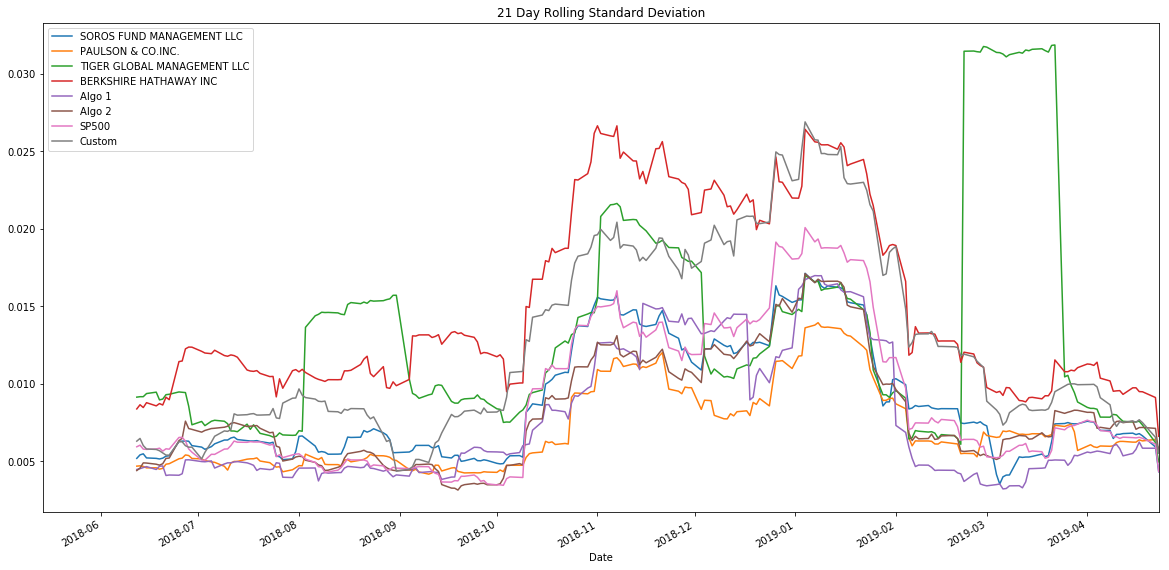

In [81]:
# Calculate rolling standard deviation
rolling_std_dev = all_returns.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std_dev.plot(figsize=(20, 10), title="21 Day Rolling Standard Deviation")

### Calculate and plot the correlation

In [82]:
# Calculate and plot the correlation
df = all_returns.corr()
df.style.background_gradient(cmap="bwr")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Custom
SOROS FUND MANAGEMENT LLC,1,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.73325
PAULSON & CO.INC.,0.791962,1,0.485375,0.650758,0.361301,0.783656,0.76668,0.64421
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1,0.325457,0.114554,0.409496,0.48103,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1,0.327,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327,1,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1,0.875721,0.739936
SP500,0.876981,0.76668,0.48103,0.852303,0.289358,0.875721,1,0.871875
Custom,0.73325,0.64421,0.391972,0.801158,0.261471,0.739936,0.871875,1


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

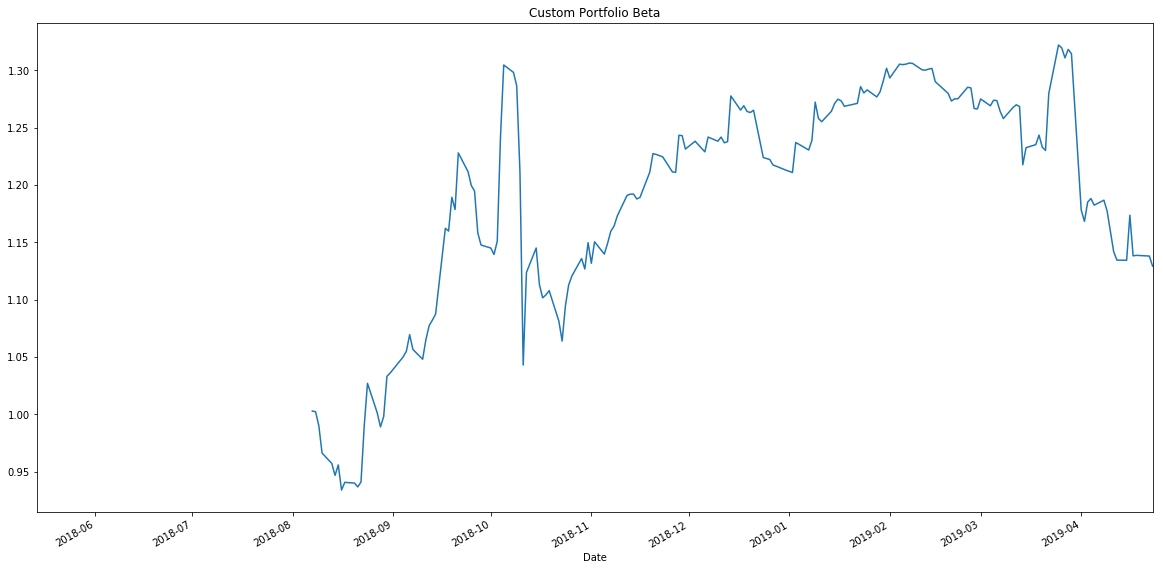

In [85]:
# Calculate and plot Beta
covariance = all_returns["Custom"].rolling(window=60).cov(all_returns["SP500"])
variance = all_returns["SP500"].rolling(60).var()
beta = (covariance / variance)
beta.plot(figsize=(20, 10), title="Custom Portfolio Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [86]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
SP500                          0.584820
Custom                         0.933123
dtype: float64

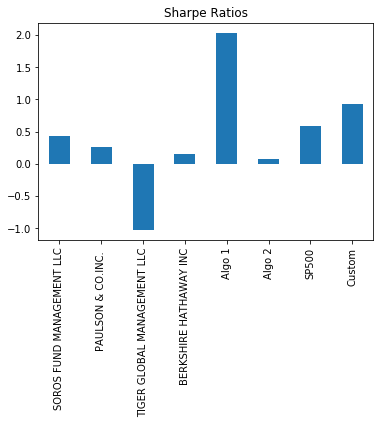

In [87]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!